<a href="https://colab.research.google.com/github/cbgk46/Advanced-Neural-Networks/blob/master/PiML_specialized_shap_and_surrogates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installs
If necessary:
- Run once
- Then restart Kernel
- Then run next cell and continue

In [ ]:
!pip install piml
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 19.3 MB/s 

Imports

In [ ]:
from piml import Experiment
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import xgboost as xgb

import pandas as pd
import numpy as np

import shap

(CVXPY) Jul 12 06:11:40 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jul 12 06:11:40 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


#### Initialize PiML

In [ ]:
exp1 = Experiment()

#### Load Taiwan Credit data

In [ ]:
exp1.data_loader(data='TaiwanCredit')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,FlagDefault
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,0.0,0.0,3.592621,3.491782,2.838849,0.000000,0.000000,0.000000,0.000000,2.838849,0.000000,0.000000,0.000000,0.000000,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,3.428621,3.237041,3.428621,3.514946,3.538574,3.513484,0.000000,3.000434,3.000434,3.000434,0.000000,3.301247,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465977,4.146996,4.132260,4.156307,4.174612,4.191731,3.181558,3.176381,3.000434,3.000434,3.000434,3.699057,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,4.672015,4.683353,4.692776,4.452016,4.461799,4.470528,3.301247,3.305351,3.079543,3.041787,3.029384,3.000434,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,3.935406,3.753660,4.554319,4.320997,4.282101,4.281760,3.301247,4.564453,4.000043,3.954291,2.838849,2.832509,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,5.276345,5.285143,5.318827,4.944507,4.494683,4.203604,3.929470,4.301052,3.699317,3.484015,3.699057,3.000434,0.0
29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,3.226342,3.262214,3.544440,3.953276,3.715251,0.000000,3.264345,3.547405,3.954194,2.113943,0.000000,0.000000,0.0
29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3.552181,3.525951,3.440752,4.319710,4.313509,4.286861,0.000000,0.000000,4.342442,3.623353,3.301247,3.491502,1.0
29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-3.216430,4.894205,4.882553,4.722428,4.073938,4.689708,4.933998,3.532754,3.071514,3.284882,4.723989,3.256477,1.0


#### Descriptive stats and basic data preparation
* Remove `AGE`, `SEX`, `EDUCATION` and `MARRIAGE`

In [ ]:
exp1.data_summary(feature_exclude=['AGE', 'SEX', 'EDUCATION', 'MARRIAGE'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,name,n_missing,mean,std,min,q1,median,q3,max
0,LIMIT_BAL,0,167484.3227,129747.6616,10000.0000,50000.0000,140000.0000,240000.0000,1000000.0000
1,AGE,0,35.4855,9.2179,21.0000,28.0000,34.0000,41.0000,79.0000
2,PAY_1,0,0.1672,0.9313,-1.0000,0.0000,0.0000,0.0000,8.0000
3,PAY_2,0,0.1184,0.9658,-1.0000,0.0000,0.0000,0.0000,8.0000
4,PAY_3,0,0.1061,0.9509,-1.0000,0.0000,0.0000,0.0000,8.0000
5,PAY_4,0,0.0692,0.9116,-1.0000,0.0000,0.0000,0.0000,8.0000
6,PAY_5,0,0.0369,0.8646,-1.0000,0.0000,0.0000,0.0000,8.0000
7,PAY_6,0,0.0352,0.8679,-1.0000,0.0000,0.0000,0.0000,8.0000
8,BILL_AMT1,0,3.8860,1.5470,-5.2190,3.5514,4.3499,4.8267,5.9843
9,BILL_AMT2,0,3.7954,1.6545,-4.8437,3.4751,4.3264,4.8062,5.9930


Data Shape:(30000, 24)


#### Assign default modeling roles and train/validation split

In [ ]:
exp1.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Select features based on Pearson correlation
* Pearson correlation also informs monotonicity constraints below

In [ ]:
exp1.feature_select()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Extract training and validation data

In [ ]:
train_x, test_x, train_y, test_y = exp1.get_raw_data()[0], exp1.get_raw_data()[3], exp1.get_raw_data()[1], exp1.get_raw_data()[4]

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Train XGBoost

In [ ]:
base_score = train_y.mean()

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'eta': 0.05,
    'subsample': 0.75,
    'colsample_bytree': 0.8,
    'max_depth': 5,
    'base_score': base_score,
    'seed': 0,
    'random_state': 0,
    'monotone_constraints': (-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1),
    'early_stopping_rounds': 20,
    'n_estimators': 250
}

mxgb = xgb.XGBClassifier(**params)
mxgb.fit(train_x, train_y, eval_set=[(test_x, test_y)])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[0]	validation_0-auc:0.75418
[1]	validation_0-auc:0.76458
[2]	validation_0-auc:0.76985
[3]	validation_0-auc:0.76879
[4]	validation_0-auc:0.76756
[5]	validation_0-auc:0.77038
[6]	validation_0-auc:0.77115
[7]	validation_0-auc:0.77170
[8]	validation_0-auc:0.77224
[9]	validation_0-auc:0.77269
[10]	validation_0-auc:0.77379
[11]	validation_0-auc:0.77474
[12]	validation_0-auc:0.77426
[13]	validation_0-auc:0.77487
[14]	validation_0-auc:0.77499
[15]	validation_0-auc:0.77555
[16]	validation_0-auc:0.77537
[17]	validation_0-auc:0.77533
[18]	validation_0-auc:0.77533
[19]	validation_0-auc:0.77564
[20]	validation_0-auc:0.77540
[21]	validation_0-auc:0.77526
[22]	validation_0-auc:0.77520
[23]	validation_0-auc:0.77555
[24]	validation_0-auc:0.77599
[25]	validation_0-auc:0.77634
[26]	validation_0-auc:0.77627
[27]	validation_0-auc:0.77628
[28]	validation_0-auc:0.77637
[29]	validation_0-auc:0.77639
[30]	validation_0-auc:0.77640
[31]	validation_0-auc:0.77645
[32]	validation_0-auc:0.77622
[33]	validation_0-au

XGBClassifier(base_score=0.22245833333333334, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=20,
              enable_categorical=False, eta=0.05, eval_metric='auc',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=(-1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1,
                                    -1),
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, ...)

#### Register to PiML

In [ ]:
pipeline = exp1.make_pipeline(model=mxgb, train_x=train_x, train_y=train_y.ravel(),
                              test_x=test_x, test_y=test_y.ravel(),
                              feature_names=['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
exp1.register(pipeline, 'mxgb')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Create SHAP global explanations

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

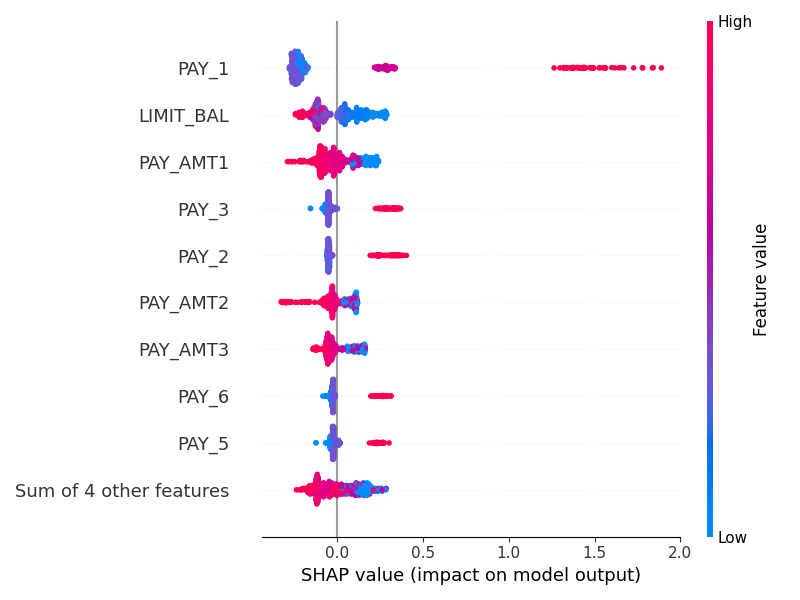

In [ ]:
exp1.model_explain(model='mxgb', show='shap_summary')
# notice monotonicity in shading

#### Determine percentiles of MXGB predictions for local explanations

In [ ]:
id = pd.DataFrame(np.arange(0, 24000), columns=['ID']) # include ID for better traceability
train_x1 = pd.DataFrame(train_x, columns=['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']) # X
train_y1 = pd.DataFrame(train_y, columns=[exp1.get_raw_data()[7]]) # y
mxgb_phat = pd.DataFrame(exp1.get_model('mxgb').predict_proba(train_x1.values)[:, 1].reshape(24000, 1),
                         columns=[str('p_' + exp1.get_raw_data()[7])]) # phat
mxgb_train_phat = pd.concat([id, train_x1, train_y1, mxgb_phat], axis=1)
mxgb_train_phat

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ID,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,p_target
0,0,20000.0,0.0,0.0,2.0,0.0,0.0,0.0,3.477266,0.000000,3.000434,3.000434,0.000000,0.000000,0.0,0.262653
1,1,260000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.220108,2.439333,2.220108,2.523747,2.220108,2.468347,0.0,0.205505
2,2,20000.0,2.0,0.0,0.0,0.0,0.0,0.0,3.176381,3.176381,2.954725,2.845718,3.170555,0.000000,1.0,0.587912
3,3,30000.0,2.0,2.0,2.0,2.0,2.0,2.0,3.255514,2.178977,3.352375,3.000434,0.000000,2.845718,1.0,0.779585
4,4,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.447313,3.301247,3.176381,2.954725,3.477266,0.000000,1.0,0.161905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23995,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.322426,3.398114,3.000434,3.000434,3.477266,3.845284,0.0,0.154808
23996,23996,210000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.845160,3.891649,3.845160,3.720573,3.732474,3.730863,1.0,0.088957
23997,23997,130000.0,0.0,0.0,0.0,0.0,0.0,2.0,3.699057,3.477266,3.398114,3.612890,0.000000,3.699057,0.0,0.139731
23998,23998,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.398114,3.494989,2.621176,3.000434,3.000434,2.699838,0.0,0.162409


In [ ]:
def get_percentile_dict(yhat_name, valid, id_):

    """ Returns the percentiles of a column, yhat_name, as the indices based on
        another column id_.

    :param yhat_name: Name of column in valid in which to find percentiles.
    :param valid: Pandas validation frame.
    :param id_: explicit id column in validation frame.

    :return: Dictionary of percentile values and index column values.

    """

    # create a copy of frame and sort it by yhat
    sort_df = valid.copy(deep=True)
    sort_df.sort_values(yhat_name, inplace=True)
    sort_df.reset_index(inplace=True)

    # find top and bottom percentiles
    percentiles_dict = {0: sort_df.loc[0, id_], 99: sort_df.loc[sort_df.shape[0] - 1, id_]}

    # find 10th-90th percentiles
    inc = sort_df.shape[0] // 10
    for i in range(1, 10):
        percentiles_dict[i * 10] = sort_df.loc[i * inc, id_]

    return percentiles_dict

mxgb_percentile_dict = get_percentile_dict('p_target', mxgb_train_phat, 'ID')
sorted(mxgb_percentile_dict.items()) # sorted list of row numbers for local investigation

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

[(0, 5019),
 (10, 6326),
 (20, 7134),
 (30, 13910),
 (40, 19752),
 (50, 8850),
 (60, 6511),
 (70, 8725),
 (80, 20251),
 (90, 5121),
 (99, 22743)]

In [ ]:
# confirm prediction from logit space
print(mxgb_train_phat.loc[mxgb_percentile_dict[10], 'p_target'])
print(np.log((mxgb_train_phat.loc[mxgb_percentile_dict[10], 'p_target'])/(1 - mxgb_train_phat.loc[mxgb_percentile_dict[10], 'p_target'])))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

0.086835176
-2.3529046045118274


#### Basic SHAP explanations

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

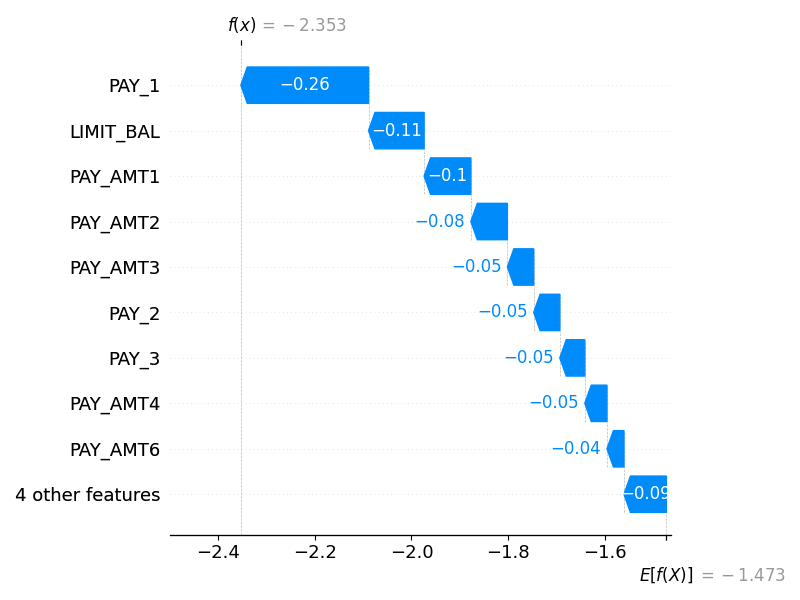

In [ ]:
exp1.model_explain(model='mxgb', show='shap_waterfall', sample_id=int(mxgb_percentile_dict[10]))

#### SHAP with reference distribution

In [ ]:
approved_applicants = mxgb_train_phat.loc[mxgb_train_phat['p_target'] < 0.1]

explainer_approved = shap.TreeExplainer(model=mxgb,
                                        data=approved_applicants[['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
                                        model_output='raw',
                                        feature_perturbation='interventional')

shap_values_approved = explainer_approved(train_x1[['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

 99%|===================| 23663/24000 [00:39<00:00]       

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

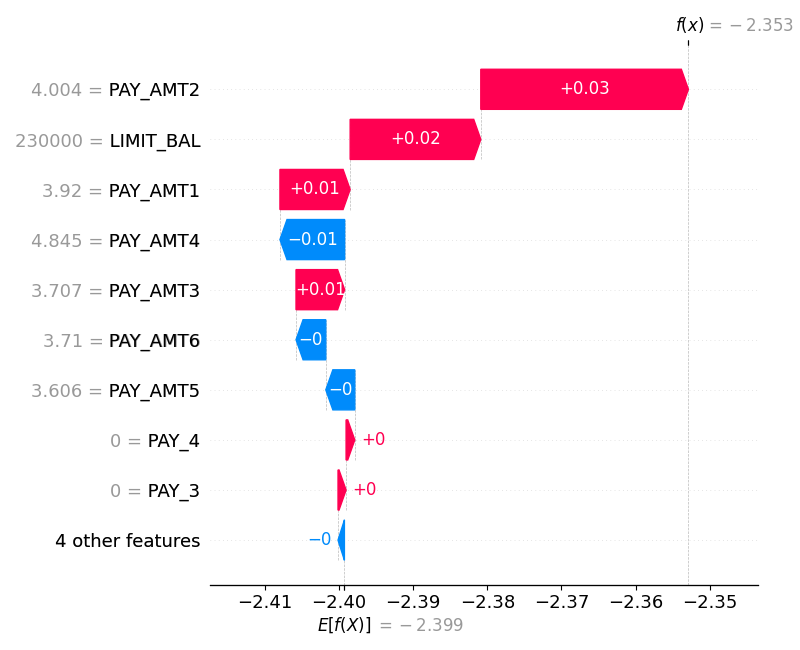

In [ ]:
shap.plots.waterfall(shap_values_approved[int(mxgb_percentile_dict[10])])

#### Explore noise bounds

In [ ]:
pseudo_std_error = np.abs(shap_values_approved.values.mean())
pseudo_std_error # this value is supposed to be zero! so these SHAP values have some statistical noise

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

0.07160106586399562

In [ ]:
shap_values_approved.values

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

array([[ 4.60484032e-01,  0.00000000e+00,  2.44318859e-04, ...,
         4.86488269e-02,  3.35874764e-02,  8.91056477e-02],
       [ 5.45257770e-03,  0.00000000e+00, -1.65864429e-05, ...,
         1.42206130e-01,  3.37512632e-02,  1.27810650e-01],
       [ 2.99200394e-01,  2.04150879e+00,  2.33263895e-03, ...,
         3.95536673e-02,  2.05328019e-02,  9.81683906e-02],
       ...,
       [ 1.80386722e-01,  0.00000000e+00,  9.49993072e-05, ...,
        -3.30317200e-03,  4.28305828e-02, -6.27337163e-04],
       [ 2.91764918e-01,  0.00000000e+00,  4.14661074e-05, ...,
         2.70733844e-02,  2.46817008e-02,  8.58480588e-02],
       [ 2.11259151e-01,  0.00000000e+00,  2.36356818e-04, ...,
         4.73676385e-03, -3.55967391e-03, -3.80480107e-03]])

In [ ]:
shap_values_approved.values = np.where(np.abs(shap_values_approved.values) < pseudo_std_error, 0, shap_values_approved.values)
shap_values_approved.values

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

array([[0.46048403, 0.        , 0.        , ..., 0.        , 0.        ,
        0.08910565],
       [0.        , 0.        , 0.        , ..., 0.14220613, 0.        ,
        0.12781065],
       [0.29920039, 2.04150879, 0.        , ..., 0.        , 0.        ,
        0.09816839],
       ...,
       [0.18038672, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29176492, 0.        , 0.        , ..., 0.        , 0.        ,
        0.08584806],
       [0.21125915, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

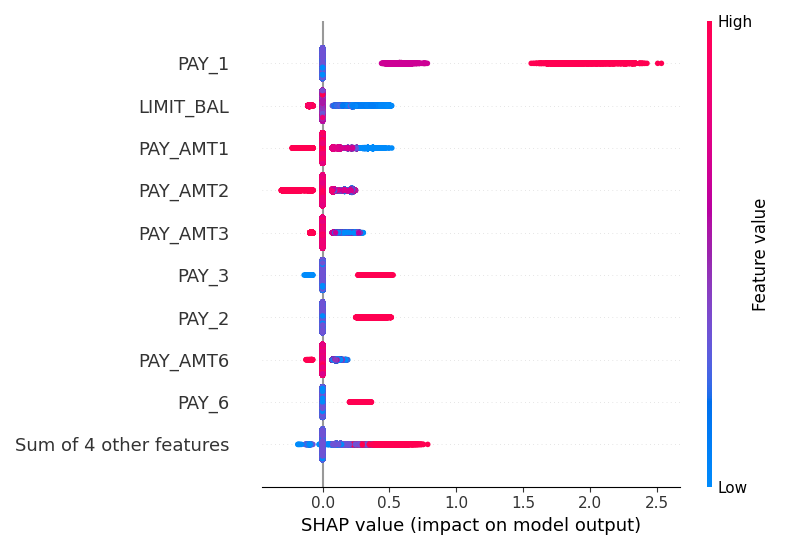

In [ ]:
shap.plots.beeswarm(shap_values_approved) # setting many values to zero destroys local accuracy, so better to stick with global or larger group explanations

In [ ]:
shap_values_approved[int(mxgb_percentile_dict[10])] # also really calls local explanations into question!

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

.values =
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

.base_values =
-2.3992426238546605

.data =
array([2.3000000e+05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.9199667e+00,
       4.0036760e+00, 3.7068884e+00, 4.8454947e+00, 3.6061664e+00,
       3.7095244e+00])

## Decision Tree Surrogate

#### Load data with MXGB predictions

In [ ]:
exp2 = Experiment()
exp2.data_loader(mxgb_train_phat) # update experiment to new data with mxgb predictions

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ID,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,p_target
0,0,20000.0,0.0,0.0,2.0,0.0,0.0,0.0,3.477266,0.000000,3.000434,3.000434,0.000000,0.000000,0.0,0.262653
1,1,260000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.220108,2.439333,2.220108,2.523747,2.220108,2.468347,0.0,0.205505
2,2,20000.0,2.0,0.0,0.0,0.0,0.0,0.0,3.176381,3.176381,2.954725,2.845718,3.170555,0.000000,1.0,0.587912
3,3,30000.0,2.0,2.0,2.0,2.0,2.0,2.0,3.255514,2.178977,3.352375,3.000434,0.000000,2.845718,1.0,0.779585
4,4,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.447313,3.301247,3.176381,2.954725,3.477266,0.000000,1.0,0.161905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23995,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.322426,3.398114,3.000434,3.000434,3.477266,3.845284,0.0,0.154808
23996,23996,210000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.845160,3.891649,3.845160,3.720573,3.732474,3.730863,1.0,0.088957
23997,23997,130000.0,0.0,0.0,0.0,0.0,0.0,2.0,3.699057,3.477266,3.398114,3.612890,0.000000,3.699057,0.0,0.139731
23998,23998,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,3.398114,3.494989,2.621176,3.000434,3.000434,2.699838,0.0,0.162409


#### Drop original target and ID features

In [ ]:
exp2.data_summary(feature_exclude=['target', 'ID'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,name,n_missing,mean,std,min,q1,median,q3,max
0,ID,0,11999.5000,6928.3476,0.0000,5999.7500,11999.5000,17999.2500,23999.0000
1,LIMIT_BAL,0,167730.9867,129482.3963,10000.0000,50000.0000,140000.0000,240000.0000,800000.0000
2,PAY_1,0,0.1691,0.9373,-1.0000,0.0000,0.0000,0.0000,8.0000
3,PAY_2,0,0.1210,0.9714,-1.0000,0.0000,0.0000,0.0000,7.0000
4,PAY_3,0,0.1093,0.9555,-1.0000,0.0000,0.0000,0.0000,8.0000
5,PAY_4,0,0.0707,0.9127,-1.0000,0.0000,0.0000,0.0000,8.0000
6,PAY_5,0,0.0355,0.8659,-1.0000,0.0000,0.0000,0.0000,8.0000
7,PAY_6,0,0.0360,0.8696,-1.0000,0.0000,0.0000,0.0000,8.0000
8,PAY_AMT1,0,2.8827,1.4089,0.0000,3.0004,3.3224,3.7000,5.9413
9,PAY_AMT2,0,2.8496,1.4235,0.0000,2.9157,3.3028,3.6991,6.2264


Data Shape:(24000, 16)


#### Assign modeling roles

In [ ]:
exp2.data_prepare() # predictions are now the target

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Train basic decision tree surrogate

In [ ]:
exp2.model_train() # train explainable tree model on inputs and predictions

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

#### Display surrogate model "flow chart" of MXGB model

In [ ]:
exp2.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
exp1.model_explain() # additional post hoc information for mxgb

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Assess surrogate model performance

In [ ]:
exp2.model_diagnose() # Tree

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

## LIME

#### Create segmented data to load into new experiment

In [ ]:
seg = mxgb_train_phat.loc[(mxgb_train_phat['PAY_1']  == 1.0) & (mxgb_train_phat['PAY_AMT1'] < 2.879374), :].copy(deep=True)
exp3 = Experiment()
exp3.data_loader(seg) # segment of higher-risk customers

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ID,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,p_target
22,22,50000.0,1.0,2.0,2.0,2.0,2.0,2.0,0.00000,3.518645,0.000000,3.193403,0.000000,2.945469,0.0,0.587272
30,30,230000.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,2.39794,3.541704,3.550962,0.000000,3.198932,2.716838,1.0,0.196376
54,54,210000.0,1.0,0.0,-1.0,-1.0,2.0,0.0,0.00000,2.676694,4.234821,0.000000,2.903632,3.699057,0.0,0.285724
55,55,420000.0,1.0,2.0,0.0,0.0,0.0,0.0,0.00000,3.301247,3.277151,3.296665,3.347720,4.361954,1.0,0.275355
63,63,90000.0,1.0,2.0,0.0,0.0,0.0,0.0,0.00000,3.527114,3.312177,3.079543,3.176381,3.176381,1.0,0.325683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23894,23894,30000.0,1.0,3.0,2.0,2.0,2.0,2.0,0.00000,0.000000,3.041787,2.699838,0.000000,2.649335,0.0,0.589810
23896,23896,160000.0,1.0,2.0,0.0,0.0,0.0,0.0,0.00000,3.301247,3.544192,3.301247,3.342620,3.477266,0.0,0.293281
23912,23912,10000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.341715
23920,23920,160000.0,1.0,2.0,2.0,2.0,0.0,0.0,0.00000,3.653309,3.398114,3.477266,3.477266,3.602169,0.0,0.361301


#### Drop target, ID, and PAY_1 features from GLM explainable model

In [ ]:
exp3.data_summary(feature_exclude=['target', 'ID', 'PAY_1']) # PAY_1 is unitary in segment

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,name,n_missing,mean,std,min,q1,median,q3,max
0,ID,0,11913.9278,6846.5469,22.0000,6094.5000,11805.5000,17729.5000,23950.0000
1,LIMIT_BAL,0,149127.3821,120269.5619,10000.0000,50000.0000,120000.0000,220000.0000,710000.0000
2,PAY_2,0,0.9930,1.1975,-1.0000,0.0000,0.0000,2.0000,7.0000
3,PAY_3,0,0.2427,0.9994,-1.0000,0.0000,0.0000,0.0000,6.0000
4,PAY_4,0,0.1866,0.9526,-1.0000,0.0000,0.0000,0.0000,8.0000
5,PAY_5,0,0.1464,0.9272,-1.0000,0.0000,0.0000,0.0000,7.0000
6,PAY_6,0,0.1148,0.9205,-1.0000,0.0000,0.0000,0.0000,6.0000
7,PAY_AMT1,0,0.2648,0.7346,0.0000,0.0000,0.0000,0.0000,2.8722
8,PAY_AMT2,0,1.9353,1.7194,0.0000,0.0000,3.0004,3.4448,5.5582
9,PAY_AMT3,0,1.6203,1.6902,0.0000,0.0000,0.0000,3.2790,5.0393


Data Shape:(1994, 16)


#### Assign modeling roles

In [ ]:
exp3.data_prepare() # predictions are now the target

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Train local interpretable GLM, like LIME

In [ ]:
exp3.model_train() # default GLM, # L1 = 0.001

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

#### Determine if GLM is any good

In [ ]:
exp3.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

#### Use GLM to explain predictions for risky segment

In [ ]:
exp3.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…